In [1]:
import scanpy as sc
import muon as mu
import numpy as np
import pandas as pd
import mofax as mofa
import seaborn as sns
import matplotlib.pyplot as plt
import pyro
from pyro.nn import PyroSample, PyroModule
from pyro.infer import SVI, Trace_ELBO, autoguide
import torch
import torch.nn.functional as F
from torch.nn.functional import softplus
from sklearn.metrics import mean_squared_error
import random
import seaborn as sns
import muon as mu
import anndata
import h5py

/scratch/venvs/deeplife2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(10, 90261)


<Axes: >

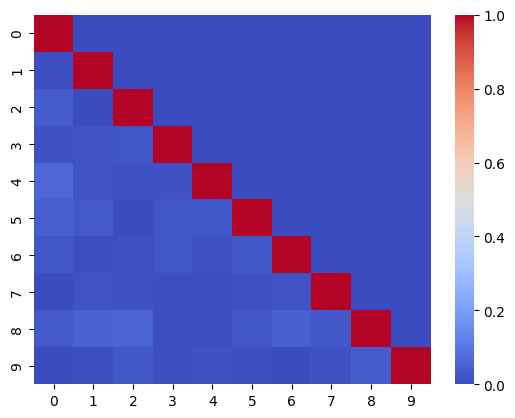

In [2]:
dir="/scratch/deeplife/projekt/"
def load_mofa_factors(file):
    with h5py.File(file, "r") as f:
        return np.array(f["expectations/Z/group1"])

Z = load_mofa_factors(dir+"models/muon_mofa_neurips_k10.hdf5")
print(Z.shape)
Z_normed = Z / np.linalg.norm(Z, axis=1)[:, np.newaxis]
sns.heatmap(np.tril(np.abs(Z_normed @ Z_normed.T)), cmap='coolwarm')

In [25]:
np.load(dir+"data/pca_factors_all_data.npz").keys()

KeysView(NpzFile '/scratch/deeplife/projekt/data/pca_factors_all_data.npz' with keys: X_pca)

In [22]:
np.savez(dir+"models/muon_mofa_neurips_k10.npz", Z=Z)

(10, 90261)


<Axes: >

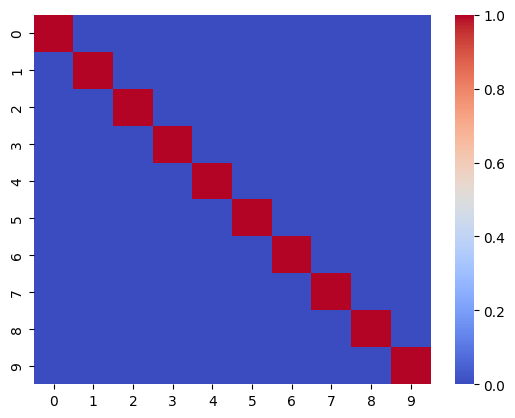

In [3]:
Z=np.load(dir+"data/pca_factors_all_data.npz")["X_pca"].T
print(Z.shape)
Z_normed = Z / np.linalg.norm(Z, axis=1)[:, np.newaxis]
sns.heatmap(np.tril(np.abs(Z_normed @ Z_normed.T)), cmap='coolwarm')